# In our e-commerce company FeelGood we have opened a wine sales section where, apart from selling wines, we would be interested in providing information about the chemical qualities of the wines.
This is the reason why we have asked a chemical laboratory to analyze several of the wines we sell to know their chemical characteristics at the level of acidity, sugars, etc.
Once we have this data collected, we would like you to tell us what chemically defines a white wine from a rosé. Could we say that apart from color and taste, chemically they are different? Is their chemical pattern different?
Hopefully by applying a logistic regression algorithm you can come to some conclusion, which you should indicate in the document attached to the code. Dominguez Tur, Julio José

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Load the files

In [2]:
red = pd.read_csv("winequality-red.csv", sep=";")
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Add a new column to differentiate wines

In [3]:
red["wine"]= "red"

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
red.shape

(1599, 13)

In [6]:
white = pd.read_csv("winequality-white.csv", sep=";")
white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
white["wine"]="white"

In [8]:
white.shape

(4898, 13)

Join them together using an append in a single Dataframe.


In [9]:
df_wines = red.append(white, ignore_index=True)
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
df_wines.shape

(6497, 13)

In [11]:
df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


We could see what would need to be normalized by the distribution of the data.

# Correction of nulls and Nan values

In [12]:
df_wines.isnull().values.any()

False

In [13]:
df_wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine                    0
dtype: int64

In [14]:
df_wines.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
wine                      2
dtype: int64

In [15]:
df_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine                     object
dtype: object

In [16]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Preparing the model

Mapping of the type of wine

In [17]:
df_wines["wine_int"] = df_wines["wine"].map({"red":1, "white":0})
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine,wine_int
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1


### Checking and elimination of duplicates

In [18]:
df_wines.duplicated().any()

True

In [19]:
df_wines2 = df_wines.drop_duplicates()
df_wines2.shape

(5320, 14)

# Performs the cleaning tasks and show the Correlations 

First we will remove the columns with str

In [20]:
df_wines2_num = df_wines2.select_dtypes(exclude=[object])
df_wines2_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_int
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


For a better understanding of the cleaning tasks, i will make a series of data visualizations

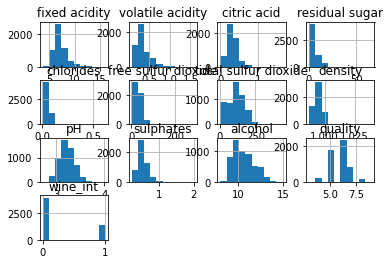

In [21]:
df_wines2_num.hist()
plt.show()

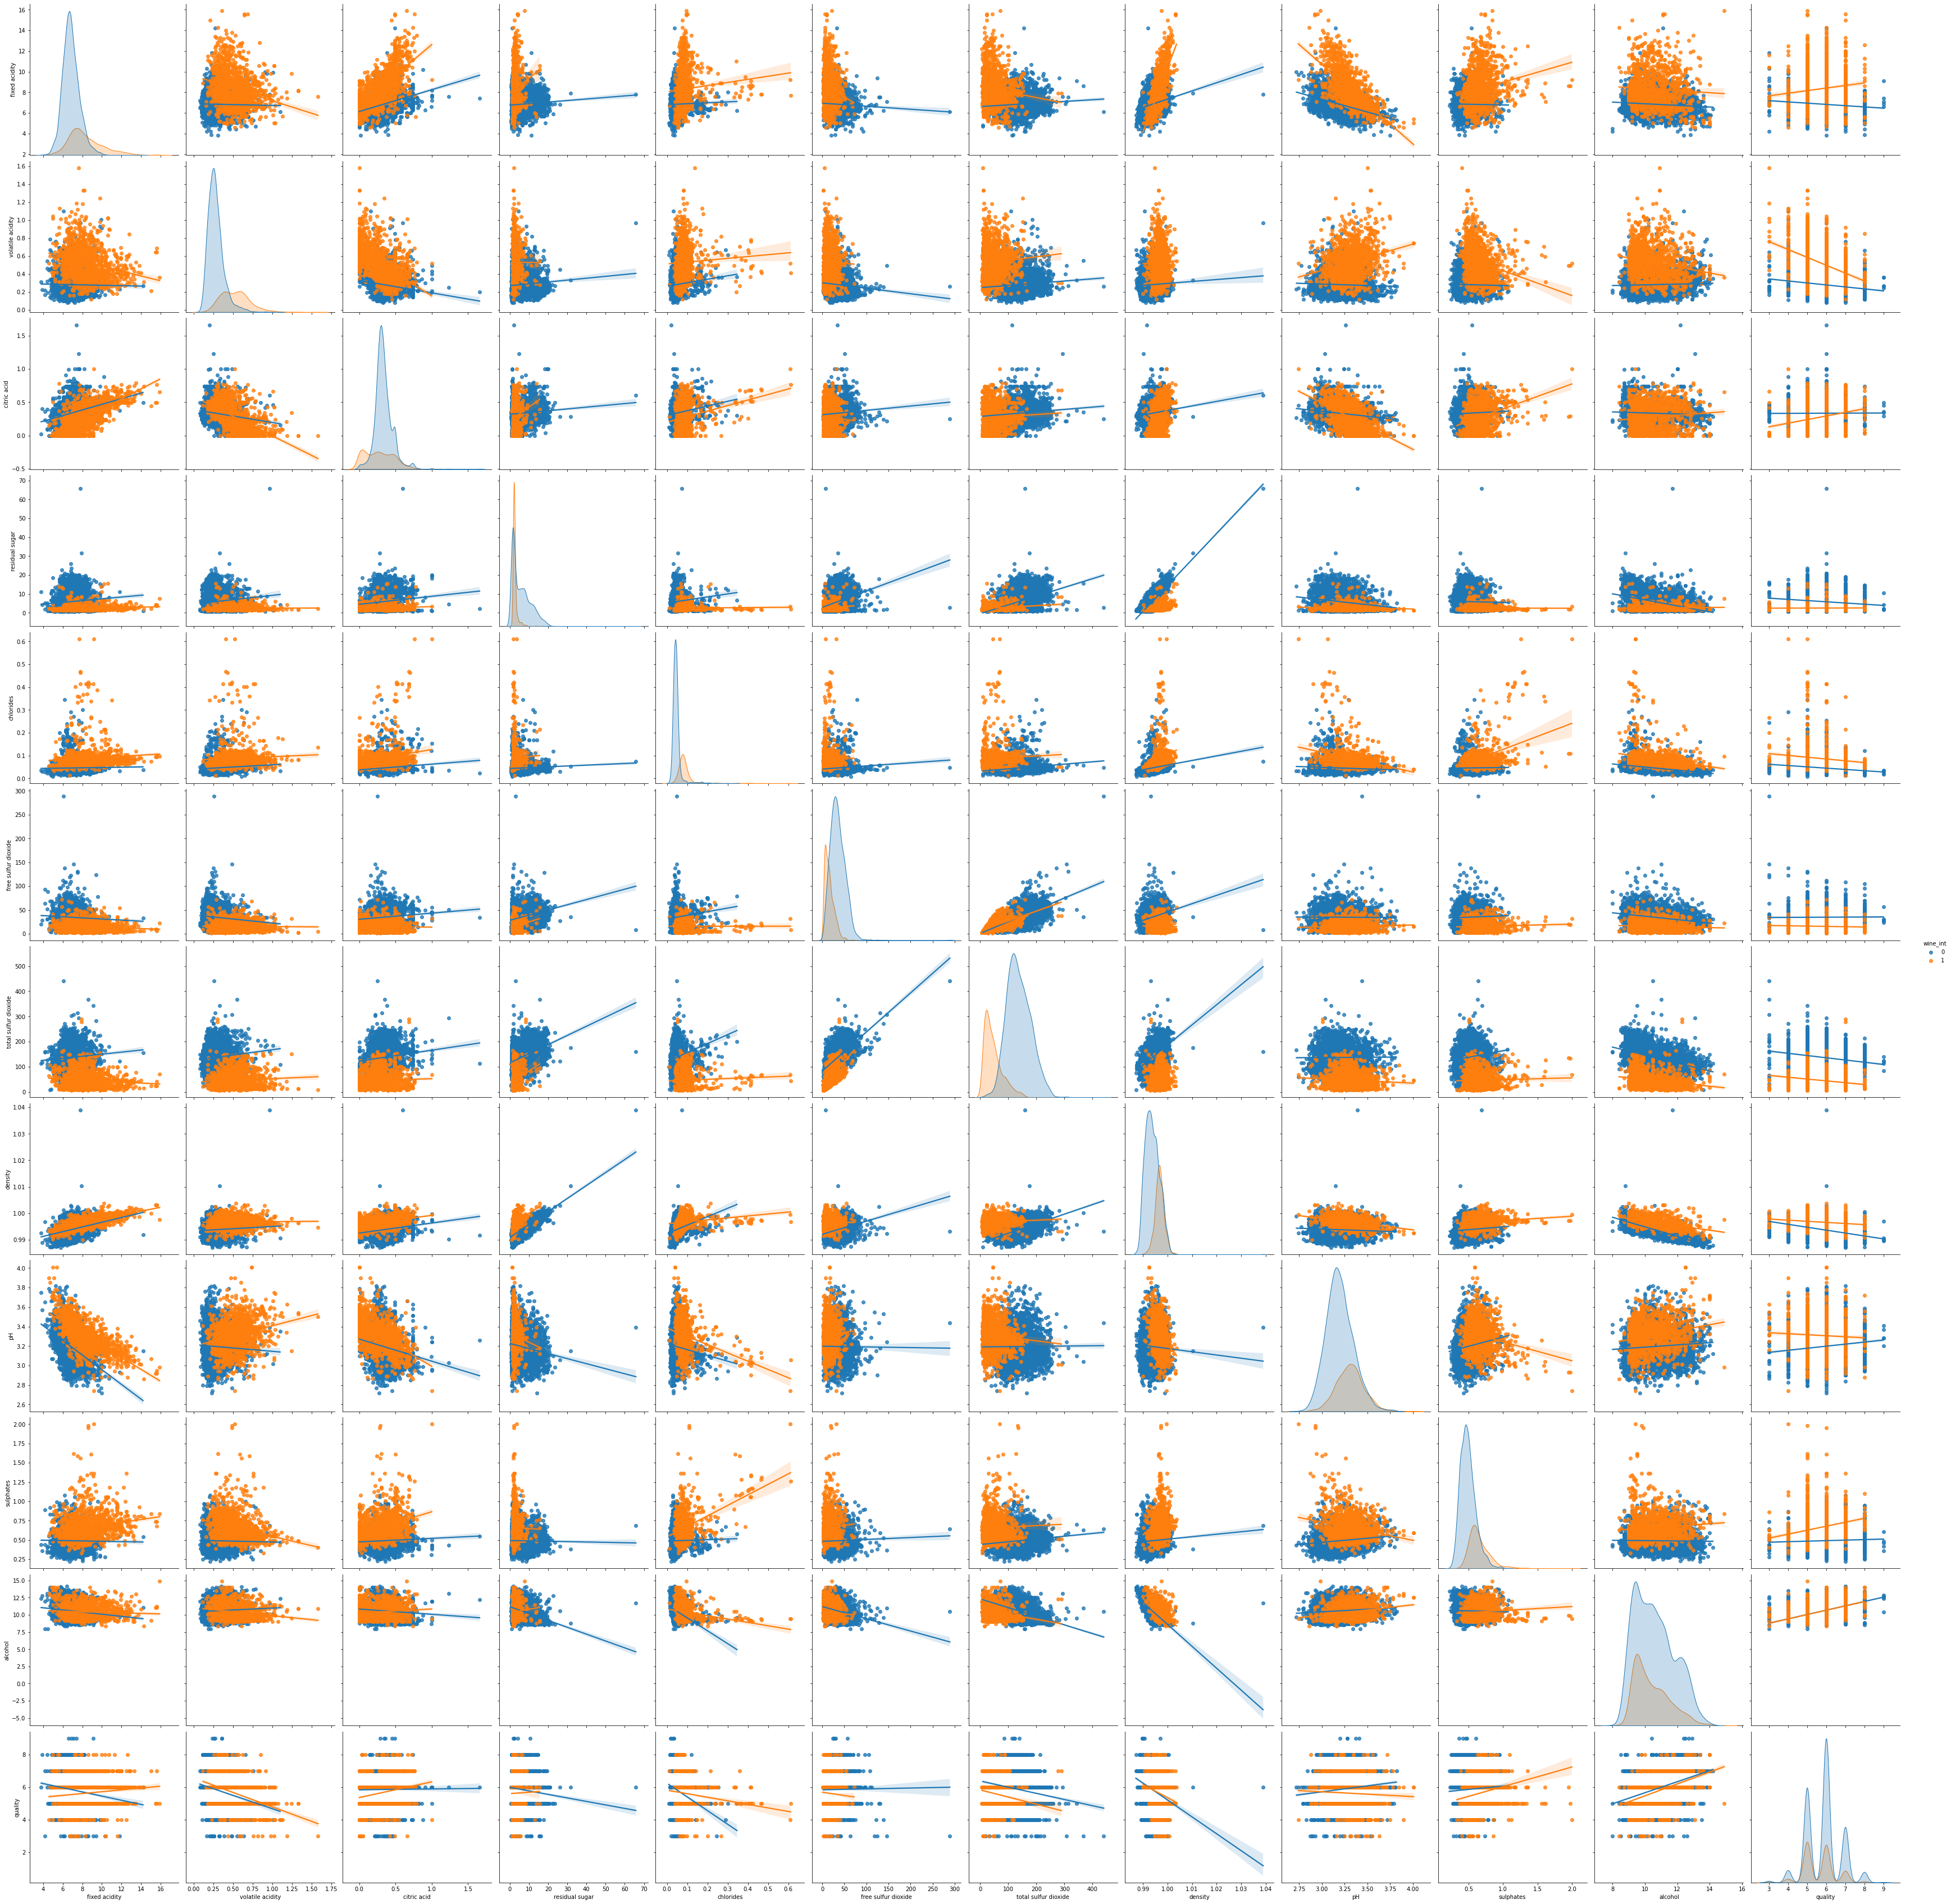

In [22]:
sns.pairplot(df_wines2_num.dropna(), hue="wine_int", height=4, vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"], kind="reg")

# Elimination of outliers if necessary (and why) 

First I define X (input variables) and y (output variables).

In [23]:
X = df_wines2_num.copy()
y = df_wines2_num["wine_int"]
del X["wine_int"]

Transform the variables from dataframe to array, we do this because a linear regression works on numpy not on dataframe.

In [24]:
X = X.to_numpy()
y = y.to_numpy()

In [25]:
X.shape[1]

12

In [26]:
print(X.shape)
print(y.shape)

(5320, 12)
(5320,)


### Analyze for outliers 

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

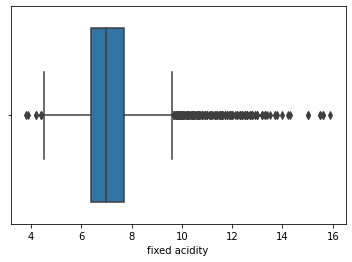

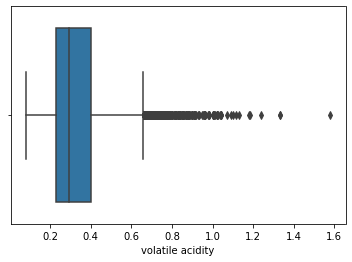

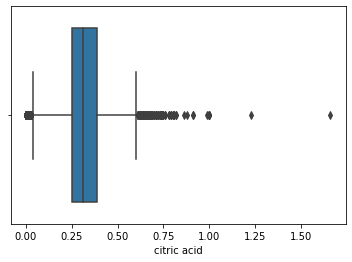

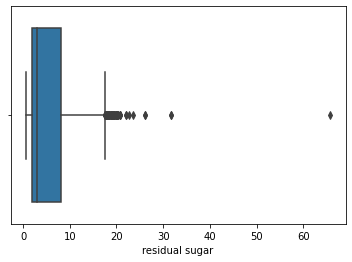

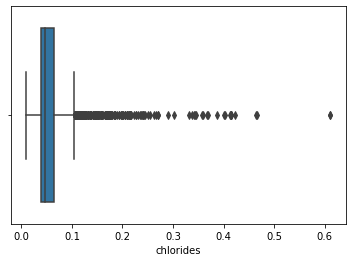

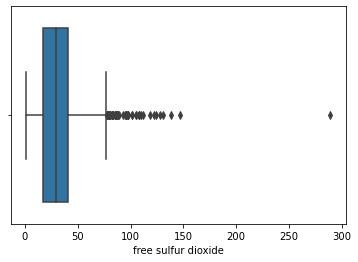

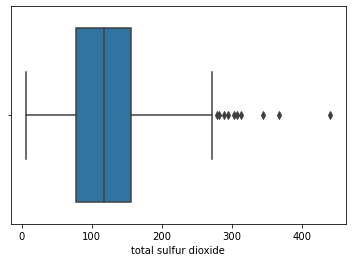

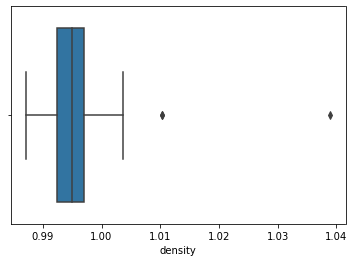

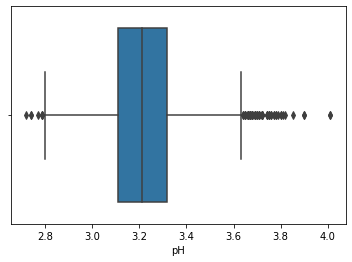

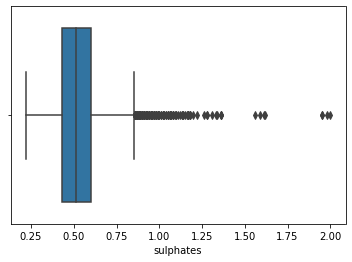

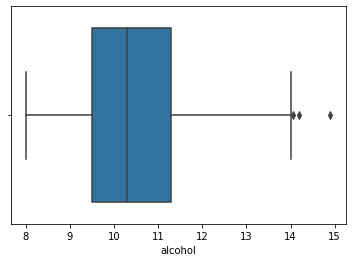

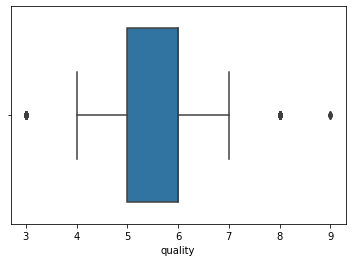

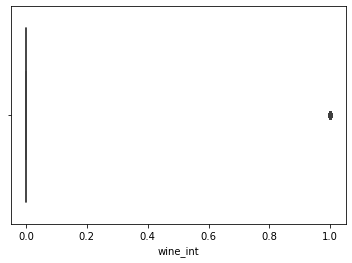

In [27]:
for col in df_wines2_num.columns:
    f, ax_new = plt.subplots(1)
    sns.boxplot(df_wines[col], ax=ax_new)

### As we can see in the graphs above, it is necessary to eliminate outliers in several columns, since they go out of range.

In [28]:
listBool = []                 
                              
for i in range(X.shape[1]):   
    
    Q1 = np.quantile(X[:,i], 0.25)    
    Q3 = np.quantile(X[:,i], 0.75)    
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR  
    upper_limit = Q3 + 1.5*IQR
    
    booleanFilter = (X[:,i] >= lower_limit) & (X[:,i] <= upper_limit)
    listBool.append(booleanFilter)   

In [29]:
listBool 

[array([ True,  True,  True, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True])]

### What we are doing is to determine the quartiles of Q1 and Q3, find the IQR and give the value True to those values that are within the range we have established.
### What we want is to create an array of 0 (False) and 1 (True), for this we have created another boolList with all the values of the listBool, in this way the boolList will be the same as the listBool, but with 0 and 1. 
### Once this is done we will create the boolMatrix of the boolList, with 0 and 1 where each row corresponds to a characteristic of each value.


In [30]:
boolList = []           

for i in listBool:       
    for j in i:
        boolList.append(j)
        
boolMatrix = np.zeros((X.shape[1], X.shape[0]))  

counter = 0

for i in range(X.shape[1]):  
    for j in range(X.shape[0]):  
        boolMatrix[i][j] = boolList[counter]    
        counter += 1

boolMatrix 

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### Must transpose it to have the same dimension as our initial matrix X

In [31]:
boolMatrix = boolMatrix.transpose()

In [32]:
boolMatrix

array([[1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### Now that both matrices (X and boolMatrix) have the same dimensions we can compare them. The criterion we have followed to decide if a value is outlier is checking if the number of false in a row is greater than 1, if it has more than 1 features in the row we will consider it outlier.

In [33]:
False_number = 1    

outlierList = []      

for i in range(X.shape[0]):       
    falseCounter = 0              
    for j in range(X.shape[1]):   
        if (boolMatrix[i][j] == 0.0 ):      
            falseCounter += 1
    
    if(falseCounter > False_number):
        outlierList.append(i)

print(outlierList)
print(len(outlierList))

[11, 12, 13, 15, 17, 35, 38, 42, 57, 64, 75, 77, 80, 85, 86, 96, 99, 109, 118, 135, 142, 150, 159, 174, 182, 185, 186, 202, 211, 226, 232, 235, 236, 237, 242, 245, 251, 252, 257, 268, 269, 283, 287, 291, 294, 295, 296, 297, 298, 301, 302, 304, 305, 308, 311, 312, 313, 314, 317, 318, 319, 320, 322, 329, 330, 331, 334, 341, 344, 345, 346, 355, 356, 363, 364, 366, 371, 375, 377, 379, 381, 383, 384, 385, 392, 393, 397, 400, 403, 406, 409, 411, 415, 418, 421, 422, 423, 424, 427, 434, 437, 438, 439, 441, 444, 446, 448, 450, 453, 468, 473, 476, 482, 484, 491, 492, 494, 508, 510, 528, 534, 536, 537, 543, 546, 549, 554, 564, 565, 579, 582, 592, 596, 597, 599, 606, 615, 619, 632, 637, 652, 668, 669, 671, 687, 698, 718, 719, 727, 741, 764, 771, 785, 808, 828, 868, 895, 905, 918, 920, 927, 931, 943, 977, 989, 994, 995, 1006, 1009, 1016, 1018, 1019, 1026, 1028, 1039, 1066, 1073, 1079, 1089, 1106, 1113, 1121, 1123, 1125, 1134, 1162, 1163, 1164, 1165, 1190, 1198, 1216, 1217, 1245, 1246, 1250, 1253, 1

### We can see there are 267 outliers following our criteria. We will proceed to eliminate them

In [34]:
Xlist = []   
ylist = []    

for i in range(X.shape[0]):
    rowList = []
    for j in range(X.shape[1]):   
        rowList.append(X[i][j])
    Xlist.append(rowList)
    ylist.append(y[i])
    
for i in reversed(outlierList):
    del ylist[i]
    del Xlist[i]  
    
X_without_outliers = np.zeros((X.shape[0] - len(outlierList), X.shape[1]))
y_without_outliers = np.zeros(X.shape[0] - len(outlierList))
for i in range(X.shape[0] - len(outlierList)):
    for j in range(X.shape[1]):
        X_without_outliers[i][j] = Xlist[i][j]
        y_without_outliers[i] = ylist[i]

In [35]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("X_without_outliers shape: ", X_without_outliers.shape)
print("y_without_outliers shape: ", y_without_outliers.shape)

X shape:  (5320, 12)
y shape:  (5320,)
X_without_outliers shape:  (5053, 12)
y_without_outliers shape:  (5053,)


In [36]:
X_without_outliers

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

# Normalize if necessary (and why)

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac291568e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac29156fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac29156580>,
 'medians': [<matplotlib.lines.Line2D at 0x2ac291606a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ac29160a00>,
 'means': []}

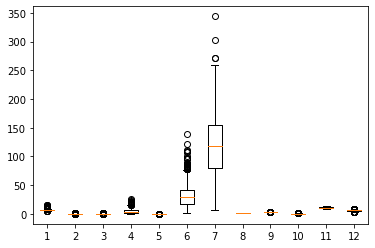

In [37]:
plt.boxplot(X_without_outliers)

### Can see it is necessary to normalize, since there are very different ranges of data in the columns, so we will bring the following function.

### Can also see that it is necessary to normalize by analyzing the table that we did at the beginning with the describe We will call our normalized function in the same way.

In [38]:
X_without_outliers = StandardScaler().fit_transform(X_without_outliers)
X_without_outliers

array([[ 0.23892941,  2.30017609, -2.29089269, ...,  0.29376397,
        -0.97698883, -0.93885709],
       [ 0.57900484,  3.4361972 , -2.29089269, ...,  1.22034909,
        -0.63890989, -0.93885709],
       [ 0.57900484,  2.67884979, -1.99628667, ...,  0.98870281,
        -0.63890989, -0.93885709],
       ...,
       [-0.52624032, -0.60298898, -0.89151409, ..., -0.47839029,
        -0.97698883,  0.22504008],
       [-1.3764289 , -0.28742756, -0.08134753, ..., -1.0961137 ,
         1.89668222,  1.38893725],
       [-0.95133461, -0.79232583,  0.50786452, ..., -1.55940626,
         1.05148485,  0.22504008]])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac29289a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac29299130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac292896d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2ac292997f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ac29299b50>,
 'means': []}

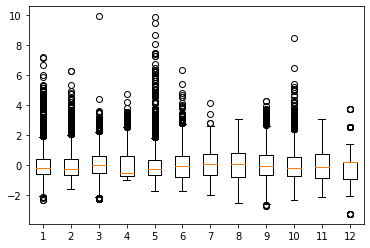

In [39]:
plt.boxplot(X_without_outliers)

# Show the correlations

In [40]:
matriz = df_wines2_num.corr()

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality'),
 Text(12.5, 0, 'wine_int')]

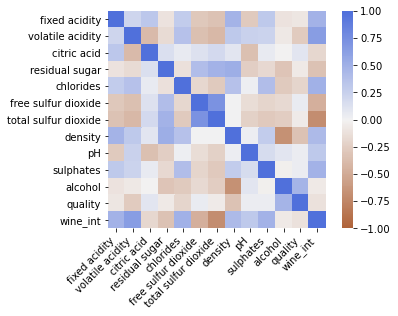

In [41]:
matriz = df_wines2_num.corr()
ax = sns.heatmap(matriz, 
            center=0, vmin=-1, vmax=1,
            cmap=sns.diverging_palette(30, 260, n=260),
            square=True)
ax.set_xticklabels(          
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Training the logistic regression model 

### Subdivide our input data randomly (shuffled) using 80% of records for training and 20% for validation.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_without_outliers, y_without_outliers, test_size=0.3)

### Apply logistic regression

In [43]:
lr = LogisticRegression(verbose=1)
modelo = lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [44]:
lr.score(X_train, y_train)  


0.9951936669493922

In [45]:
predicciones = lr.predict(X_test)
predicciones

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
np.unique(predicciones, return_index=False, return_inverse=False, return_counts=True, axis=None)

(array([0., 1.]), array([1155,  361], dtype=int64))

In [47]:
lr.score(X_test, y_test)


0.9934036939313984

In [48]:
lr.predict_proba(X_test)

array([[9.98948713e-01, 1.05128659e-03],
       [9.98695374e-01, 1.30462646e-03],
       [9.99998462e-01, 1.53838242e-06],
       ...,
       [9.99378471e-01, 6.21529119e-04],
       [9.99574717e-01, 4.25282500e-04],
       [9.97676558e-01, 2.32344155e-03]])

# Confusion matrix and Accuracy

In [49]:
confusion_matrix( y_test, predicciones)  

array([[1150,    5],
       [   5,  356]], dtype=int64)

In [50]:
df_conf = pd.DataFrame(confusion_matrix(y_test, predicciones), columns=['Predicted 0', 'Predicted 1'] )
df_conf

,Predicted 0,Predicted 1
0,1150,5
1,5,356


In [62]:
print ( ' Model coefficients ', modelo.coef_, '\nIntercept ', modelo.intercept_ )

 Model coefficients  [[-0.09100892  1.43440714 -0.06781246 -2.21070642  0.62469189  0.73314438
  -3.11240608  4.09550016  0.21334895  0.4669671   1.46259587  0.24403954]] 
Intercept  [-3.91127262]


In [52]:
roc = metrics.roc_auc_score(y_test, predicciones)
acc = metrics.accuracy_score(y_test, predicciones)
prec = metrics.precision_score(y_test, predicciones)
rec = metrics.recall_score(y_test, predicciones)
f1 = metrics.f1_score(y_test, predicciones)

print ( 'Roc: ', roc, '\nAccuracy: ', acc, '\nRecall: ', rec, '\nPrecision: ', prec, '\nF1 score: ', f1)

Roc:  0.9909102900792651 
Accuracy:  0.9934036939313984 
Recall:  0.9861495844875346 
Precision:  0.9861495844875346 
F1 score:  0.9861495844875345


### The recall gives us the % of succes,
### Accuracy gives us the % of prediction.

In [53]:
print(metrics.classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1155
         1.0       0.99      0.99      0.99       361

    accuracy                           0.99      1516
   macro avg       0.99      0.99      0.99      1516
weighted avg       0.99      0.99      0.99      1516



The accuracy gives us the % of hits in general, whether it is the red or white wine class.

We have 3 metrics that measure us at the wine class level:

    Accuracy: % of succes we have with respect to the predictions, the two predicted classes.
    Recall: % of hits we have on a wine class with respect to the real expected values.
    F1 score: is the average value between recall and precision.

In the case of Recall we look at the actual values:

    Recall of class 0 (white): In this case the Recall on the real class 0 is 100%.

    Recall % on class 1 (red) is 99%.

In the case of accuracy we look at the values requested.

    Accuracy of class 0 (white): 99%.
    Accuracy of class 1 (red): 99%.

99% of red wines can be identified thanks to their chemical characteristics, i.e. the model will only be wrong 1% of the time when predicting if the wine is red. The same will be true for white wine

The F1 value assumes that we care equally about accuracy and recall. For both wine classes we have a fairly high F1. Class 0 = 100% Class 1 = 99%.

However, it classifies red wines a little worse than white wines, even though they only differ by 1%.


 ### As we can see in the input31 , there are some variables that have very similar characteristics between red and white wines.

### Therefore, we could analyze the data with the PCA function, which is a technique that tries to reduce the number of dimensions (number of variables) of a data set while trying to preserve as much information as possible. PCA can only be done on normalized variables.

### We will again use this Matplot function to see if the X is normalized.


{'whiskers': [<matplotlib.lines.Line2D at 0x2ac2a5cc040>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac2a5cc700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac2a5beca0>,
 'medians': [<matplotlib.lines.Line2D at 0x2ac2a5ccdc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ac2a5d8160>,
 'means': []}

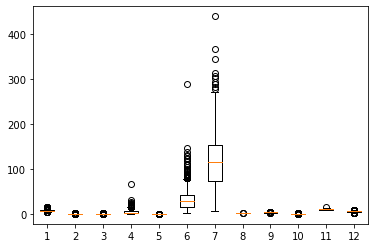

In [54]:
plt.boxplot(X)

### As we see that it is not normalized, we will proceed to normalize it since we cannot compare two variables if one is normalized and the other is not.

In [55]:
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[ 0.14006434,  2.11534878, -2.16451528, ...,  0.1779407 ,
        -0.96915199, -0.90449728],
       [ 0.44319875,  3.18529696, -2.16451528, ...,  0.97938943,
        -0.63183308, -0.90449728],
       [ 0.44319875,  2.47199817, -1.89267181, ...,  0.77902725,
        -0.63183308, -0.90449728],
       ...,
       [-0.54198809, -0.61896323, -0.87325881, ..., -0.48993324,
        -0.96915199,  0.23226755],
       [-1.29982413, -0.32175541, -0.12568928, ..., -1.0242324 ,
         1.89805872,  1.36903238],
       [-0.92090611, -0.79728793,  0.41799765, ..., -1.42495677,
         1.05476146,  0.23226755]])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac2a7097f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac2a709eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac2a709460>,
 'medians': [<matplotlib.lines.Line2D at 0x2ac2a7185b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ac2a718910>,
 'means': []}

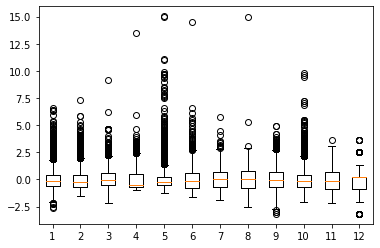

In [56]:
plt.boxplot(X_norm)

Text(0.5, 1.0, 'Color = ytrue')

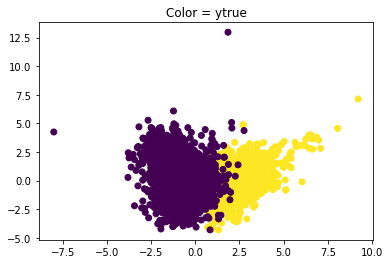

In [57]:
miPCA = PCA(n_components=2)   #de esta forma esta función combinará los datos creando dos variables, a partir de 2 variables no se consiguen mejoras significativas

Xtr = miPCA.fit_transform(X_norm)

plt.figure()
plt.subplot(1,1,1)
plt.scatter(Xtr[:,0],Xtr[:,1],c=y)
plt.title('Color = ytrue')

### This second PCA will be done with the normalized variable and without the outliers.



Text(0.5, 1.0, 'Color = ytrue')

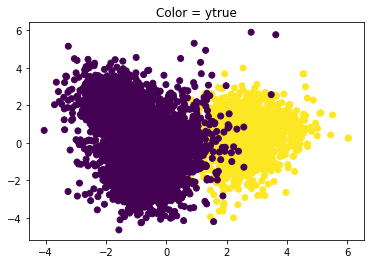

In [58]:
miPCA = PCA(n_components=2)

Xtr = miPCA.fit_transform(X_without_outliers)

plt.figure()
plt.subplot(1,1,1)
plt.scatter(Xtr[:,0],Xtr[:,1],c=y_without_outliers)
plt.title('Color = ytrue')

### Podemos observar que después de quitar los outliers hay una mejora en el modelo, es más preciso

# CONCLUSIONS

### We can see that the model has a high probability of accuracy to be able to differentiate a white wine from a red wine through the chemical characteristics it possesses.

### Even if we increase the number of False_number we want in a row, the accuracy hardly varies, which may indicate that the outliers do not have a negative effect on our model.